**Menentukan Pertanyaan Bisnis**


> 1. musim apa yang memiliki sewa tertinggi per harinya?
> 2. Bagaimana pola penyewaan sepeda berdasarkan bulan dan jam?
> 3. adakah pengaruh cuaca terhadap sewa sepeda per harinya?
> 4. perbandingan jumlah sewa setiap hari, mana hari yang memiliki sewa tertinggi dan terendah?

**Import semua library yang dibutuhkan**

In [101]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [102]:
#mengimport dataset 
hari = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")
hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [103]:
#mengimport dataset
jam = pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Penggabungan data hari dan jam

dataset ini memiliki 2 dataframe yang akan digunakan yaitu day dan hour. 
keduanya memiliki tabel yang sama tetapi satuan yang berbeda.

In [104]:
# menggabungkan dengan menggunakan inner join
df = hari.merge(jam, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
missing_dates = df[df["dteday"].isnull()]
df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [105]:
df.to_csv('df_bike.csv', index=False)

## Assessing Data

assessing dilakukan untuk mengecek tipe data, missing value, duplikat data, dan outlier.


In [106]:
# menilai DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

**Menilai Data** df

mengecek Missing Value

In [107]:
df.isnull().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

tidak terdapat indikasi data missing value seperti yang tertera

**Mengecek duplikasi pada data**

In [108]:
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  0


data tidak memiliki duplikasi

In [109]:
df.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

In [110]:
df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore

In [111]:
df.groupby(by="season_hourly").agg({
    "workingday_hourly": "sum",  # penyewa pada hari kerja berdasarkan musim per jam
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday_hourly", "sum"))

workingday_hourly windspeed_hourly                          
                            sum              max  min      mean <lambda_0>
season_hourly                                                             
1                          2794           0.8060  0.0  0.215107     0.8060
4                          2864           0.6418  0.0  0.170819     0.6418
2                          3066           0.7164  0.0  0.203410     0.7164
3                          3141           0.8507  0.0  0.171593     0.8507

In [112]:
df.groupby(by="season_daily").agg({
    "workingday_daily": "sum", # penyewa pada hari kerja berdasarkan musim per hari
    "windspeed_daily": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday_daily", "sum"))

workingday_daily windspeed_daily                               
                          sum             max       min      mean <lambda_0>
season_daily                                                                
1                        2794        0.507463  0.045408  0.215107   0.462055
4                        2864        0.422275  0.022392  0.170819   0.399883
2                        3066        0.388067  0.065929  0.203410   0.322138
3                        3141        0.375617  0.064071  0.171593   0.311546

In [113]:
# memberikan label untuk cuaca
weather_labels = {
    1: 'Cerah',
    2: 'Kabut',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}

df['weather_label'] = df['weathersit_daily'].map(weather_labels)

In [114]:
df.groupby('weather_label')['cnt_daily'].mean().reset_index().sort_values("cnt_daily")

,weather_label,cnt_daily
1,Hujan Ringan,1914.700855
2,Kabut,4062.717595
0,Cerah,4895.177083


### korelasi

mecari nilai korelasi dari setiap data perhari.

In [115]:
num_columns = ["holiday_daily" 
 ,"weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily", "windspeed_daily",  "cnt_daily"]
correlation = df[num_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

jumlah penyewa sepeda memiliki hubungan yang negatif terhadap hari libur, cuaca, dan kecepatan angin

mecari nilai korelasi dari setiap data per jam.

In [116]:
num_columns = ["holiday_hourly", "weekday_hourly", "workingday_hourly", "weathersit_hourly", "temp_hourly", "atemp_hourly","season_hourly", "windspeed_hourly",  "cnt_daily"]
correlation = df[num_columns].corr()
print(correlation)

                   holiday_hourly  weekday_hourly  workingday_hourly  \
holiday_hourly           1.000000       -0.102088          -0.252471   
weekday_hourly          -0.102088        1.000000           0.035955   
workingday_hourly       -0.252471        0.035955           1.000000   
weathersit_hourly       -0.017036        0.003311           0.044672   
temp_hourly             -0.027340       -0.001795           0.055390   
atemp_hourly            -0.030973       -0.008821           0.054667   
season_hourly           -0.009585       -0.002335           0.013743   
windspeed_hourly         0.003988        0.011502          -0.011830   
cnt_daily               -0.070344        0.064204           0.068216   

                   weathersit_hourly  temp_hourly  atemp_hourly  \
holiday_hourly             -0.017036    -0.027340     -0.030973   
weekday_hourly              0.003311    -0.001795     -0.008821   
workingday_hourly           0.044672     0.055390      0.054667   
weathersit_

jumlah penyewa sepeda memiliki hubungan yang negatif terhadap hari libur, cuaca, dan kecepatan angin

**Visualization & Explanatory Analysis**

> **1. musim apa yang memiliki sewa tertinggi per harinya dan per jamnya?**

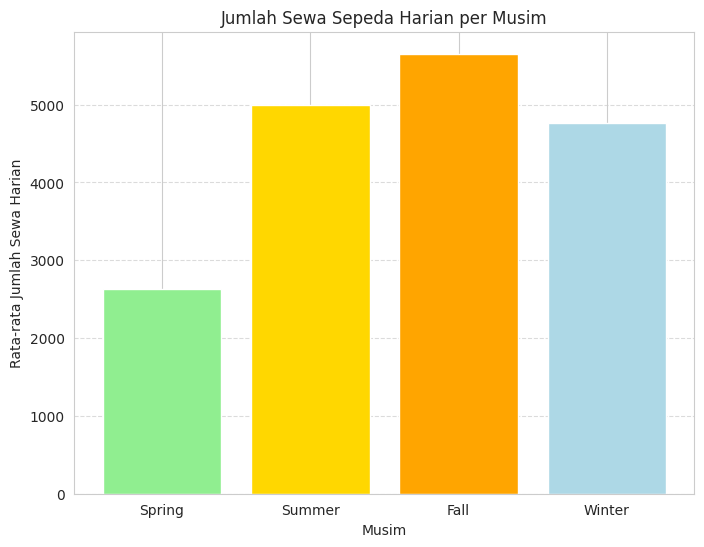

In [117]:
seasonal_data = df.groupby('season_daily')['cnt_daily'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(8, 6))
plt.bar(season_names, seasonal_data, color=['lightgreen', 'gold', 'orange', 'lightblue'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Jumlah Sewa Sepeda Harian per Musim')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

dari grafik tersebut bisa disimpulkan bahwa jumlah sewa sepeda lebih banyak pada Fall dengan sewa per hari bisa mendapatkan sewa sampe 5000+, tempat kedua diikuti oleh summer dengan hasil 5000 penyewa, tempat ketiga adalah winter dengan -+4700 penyewa dan terakhir adalah spring dengan -+2500 penyewa.

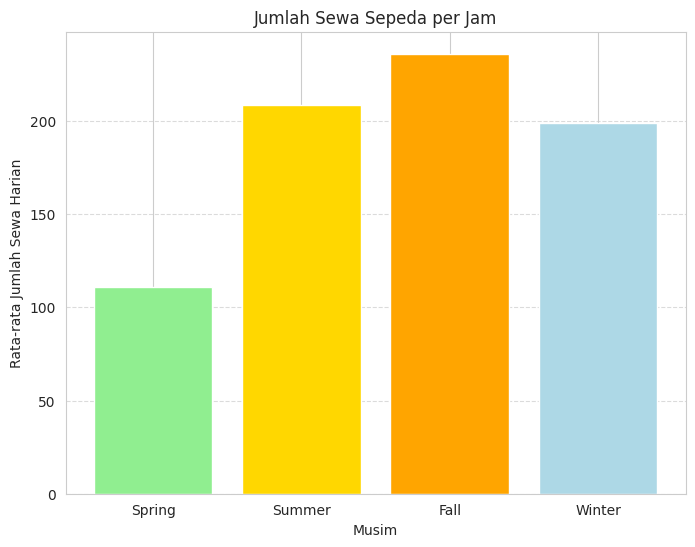

In [118]:
seasonal_data = df.groupby('season_hourly')['cnt_hourly'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(8, 6))
plt.bar(season_names, seasonal_data, color=['lightgreen', 'gold', 'orange', 'lightblue'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Jumlah Sewa Sepeda per Jam')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

dari grafik tersebut bisa disimpulkan bahwa jumlah sewa sepeda per jam lebih banyak pada Fall dengan sewa per jam bisa mendapatkan sewa sampai -+250, tempat kedua diikuti oleh summer dengan hasil 210 penyewa, tempat ketiga adalah winter dengan 190 penyewa dan terakhir adalah spring dengan 110 penyewa.

> **2. Bagaimana pola penyewaan sepeda berdasarkan bulan, jam?**


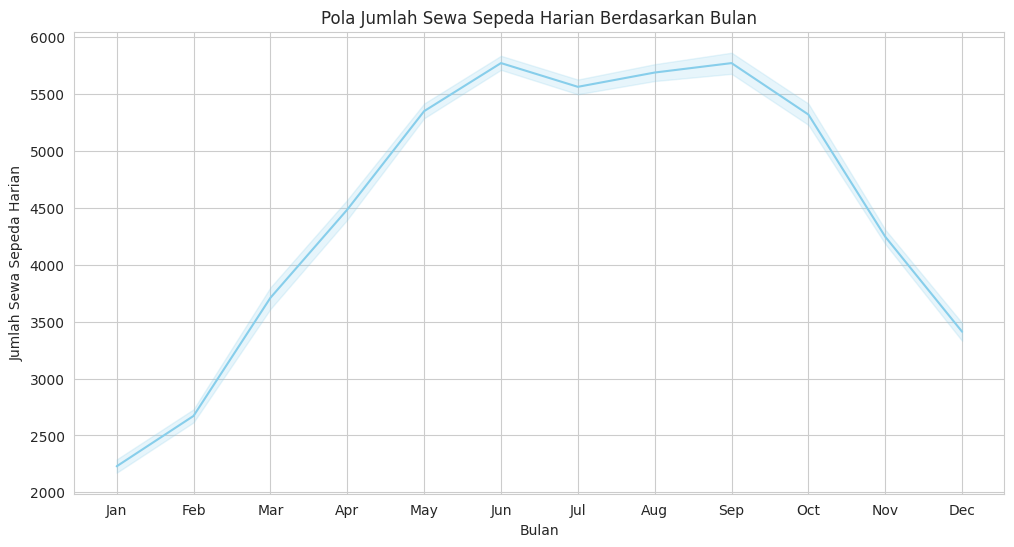

In [119]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth_daily", y="cnt_daily", data=df, color='skyblue')
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

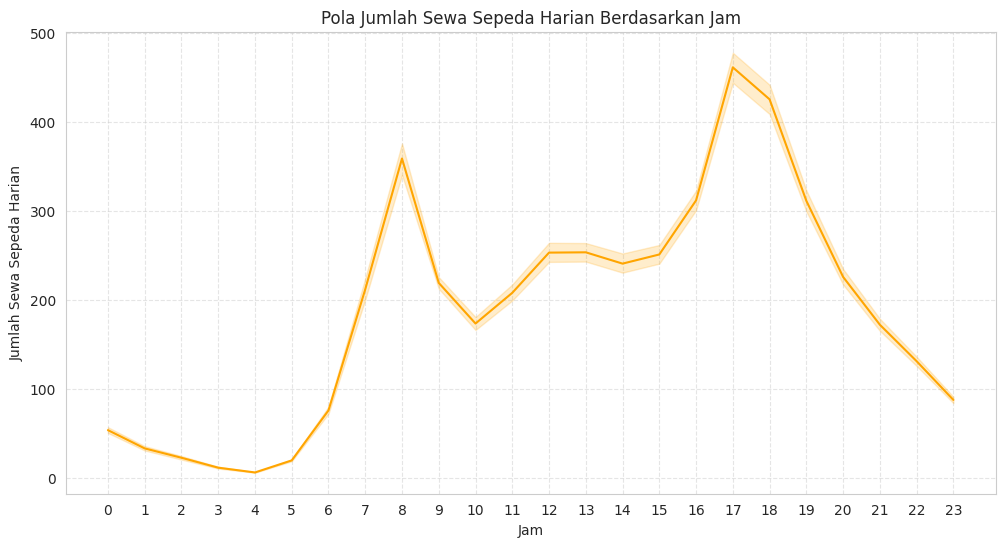

In [120]:
# Pola berdasarkan jam
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=df, color='orange')
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.xticks(range(24))
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

kedua grafik diatas dapat dilihat bahwa terdapat pola yaitu penyewaan sepeda akan terus meningkat dari musim semi (spring) sampai musim panas dan akan menurun sampai akhir musim, kemudian pada musim gugur tingkat sewa sepeda akan naik sampai menyentuh level tertinggi di musim gugur. Jadi penyewaan sepeda lebih banyak terjadi pada bulan 6 dan bulan 9 dan menurun pada bulan 10. Sedangkan berdassarkan jam jumlah sewa sepeda akan meningkat sekitar jam 8 pagi dan sekitar jam 3 sore akan mengalami kenaikan sampe pukul 5 sore mungkin disaat orang mulai pulang dari segala aktivitasnya.

> **3. adakah pengaruh cuaca terhadap sewa sepeda per harinya??**


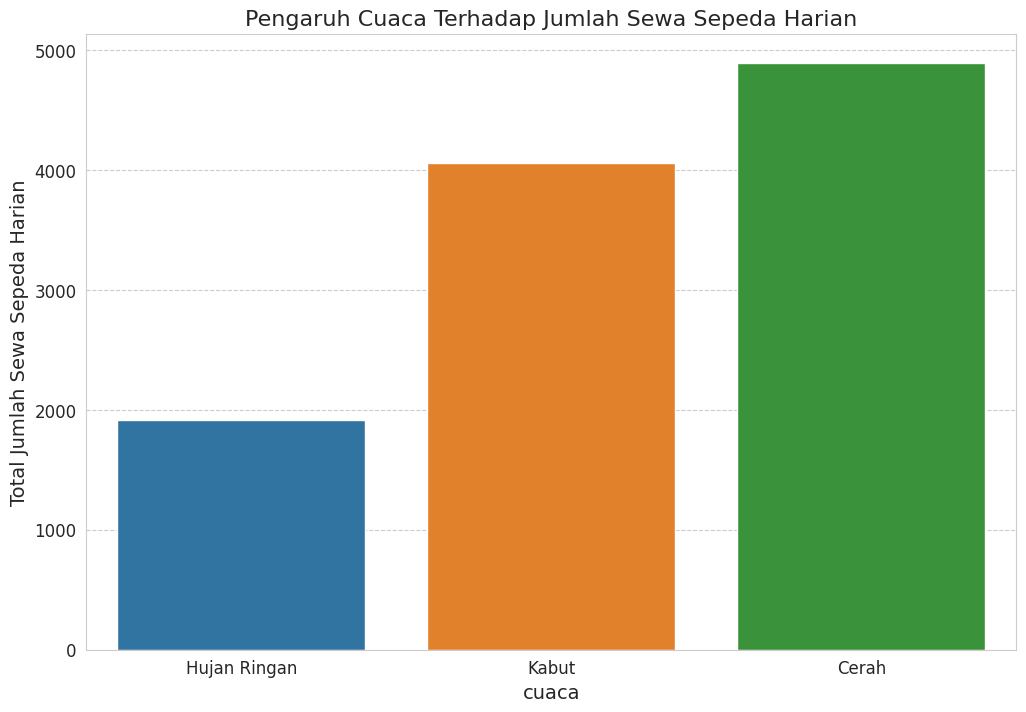

In [121]:
# Pengaruh cuaca
avg_weather = df.groupby('weather_label')['cnt_daily'].mean().reset_index().sort_values("cnt_daily")
plt.figure(figsize=(12, 8))
sns.barplot(x="weather_label", y="cnt_daily", data=avg_weather, estimator=sum)
plt.title("Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda Harian", fontsize=16)
plt.xlabel("cuaca", fontsize=14)
plt.ylabel("Total Jumlah Sewa Sepeda Harian", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

jumlah sewa sepeda mengingkat ketika cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

> **4. perbandingan jumlah sewa setiap hari, mana hari yang memiliki sewa tertinggi dan terendah?**

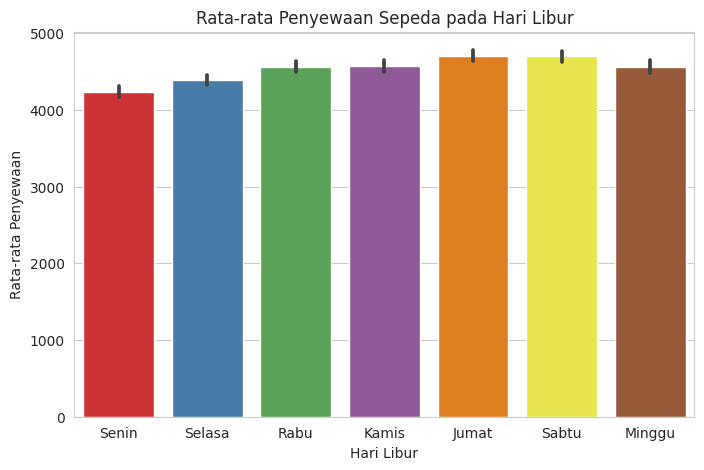

In [122]:
# Perbandingan hari sewa sepeda setiap hari

plt.figure(figsize=(8, 5))
sns.barplot(x='weekday_daily', y='cnt_daily', data=df, palette='Set1')

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis','Jumat', 'Sabtu', 'Minggu'])

plt.show()

dari grafik diatas dapat dilihat bahwa jumlah sewa sepeda lebih banyak ketika hari jumat dan sabtu dan hari senin menjadi hari dengan sewa paling sedikit.

## Conclusion

**1. musim apa yang memiliki sewa tertinggi per hari dan per jam**

    Dari grafik yang sudah dibuat dapat di lihat bahwa, jumlah sewa sepeda tertinggi per harinya ada pada pada musim gugur(Fall).
    Sedangkan untuk sewa per jam juga, musim gugur(Fall) masih menjadi yang tertinggi.
 
    
**2. Bagaimana pola penyewaan sepeda berdasarkan bulan dan jam?**

    Penyewaan sepeda per hari pada bulan Juni dan September menjadi yang tertinggi, 
    berdasarkan pertanyaan sebelumnya memang musim gugur menjadi musim yang memiliki sewa sepeda tertinggi. 
    Sedangkan untuk per jam, penyewaan sepeda meningkat pada pukul 8 disaat orang-orang mulai beraktivitas 
    dan meningkat lagi pada pukul 5 sore disaat orang-orang pulang ke rumah.

**3. Adakah pengaruh cuaca terhadap jumlah sewa sepeda per harinya?**

    Jumlah sewa tertinggi terjadi disaat cuaca Cerah dan saat cuacanya hujan sewa sepeda mengalami penurunan yang cukup signifikan.
    
**4. perbandingan jumlah sewa setiap hari, mana hari yang memiliki sewa tertinggi dan terendah??**

    Jumlah sewa sepeda lebih banyak ketika hari jumat dan sabtu dan hari senin menjadi hari dengan sewa paling sedikit.
